In [1]:
# Question 0 - Data Preparation

# Import libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("1658287.csv")

# Drop rows with missing survey_id
df = df.dropna(subset=["survey_id"])

# Impute missing caffeinated_drinks with the median
median_caffeine = df["caffeinated_drinks"].median()
df["caffeinated_drinks"].fillna(median_caffeine, inplace=True)

# Verify there are no missing values left
print(df.isna().sum())

# Check the shape after cleaning
print("Shape after cleaning:", df.shape)



survey_id             0
gender                0
living_arrangement    0
exercise_frequency    0
screen_time           0
caffeinated_drinks    0
cigarettes            0
dtype: int64
Shape after cleaning: (831, 7)


/tmp/ipykernel_26002/329343048.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["caffeinated_drinks"].fillna(median_caffeine, inplace=True)


In [2]:
# Question 1a - Central tendency and variation

import numpy as np

# Whole sample
overall_mean = df["cigarettes"].mean()
overall_median = df["cigarettes"].median()
overall_std = df["cigarettes"].std()
overall_var = df["cigarettes"].var()

# Smokers only (cigarettes > 0)
smokers = df[df["cigarettes"] > 0]
smoker_mean = smokers["cigarettes"].mean()
smoker_median = smokers["cigarettes"].median()
smoker_std = smokers["cigarettes"].std()
smoker_var = smokers["cigarettes"].var()

print("Overall:")
print(f"Mean: {overall_mean:.2f}, Median: {overall_median}, Std: {overall_std:.2f}, Var: {overall_var:.2f}")
print("\nSmokers only:")
print(f"Mean: {smoker_mean:.2f}, Median: {smoker_median}, Std: {smoker_std:.2f}, Var: {smoker_var:.2f}")


Overall:
Mean: 1.56, Median: 0.0, Std: 3.06, Var: 9.36

Smokers only:
Mean: 6.95, Median: 7.0, Std: 2.04, Var: 4.17


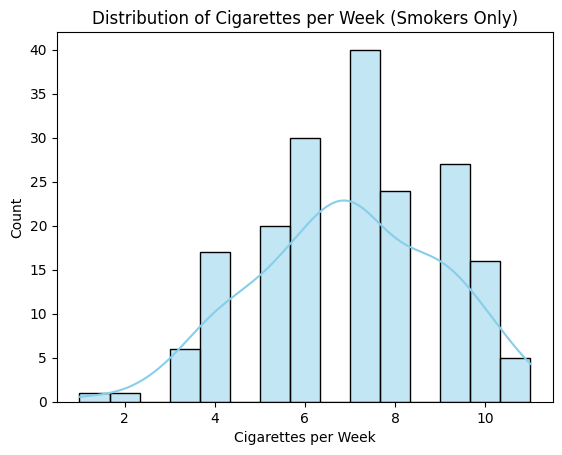

Skewness: -0.16
Mean: 6.95
Variance: 4.17


In [3]:
# Question 1b - Distribution fit and skewness (for smokers only)

import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

# Histogram with density curve
sns.histplot(smokers["cigarettes"], kde=True, bins=15, color='skyblue')
plt.title("Distribution of Cigarettes per Week (Smokers Only)")
plt.xlabel("Cigarettes per Week")
plt.ylabel("Count")
plt.show()

# Calculate skewness
skewness = skew(smokers["cigarettes"])
print("Skewness:", round(skewness, 2))

# Compare mean and variance (for Poisson check)
print("Mean:", round(smoker_mean, 2))
print("Variance:", round(smoker_var, 2))


In [4]:
# Question 1c - Male vs Female smoking (no statsmodels)

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, norm

# Define smoker flag
df["is_smoker"] = df["cigarettes"] > 0

# Contingency table
contingency = pd.crosstab(df["gender"], df["is_smoker"])
print("Contingency table:\n", contingency, "\n")

# Chi-square test
chi2, p_chi2, dof, exp = chi2_contingency(contingency.values)
print(f"Chi-square test p-value: {p_chi2:.4f}")

# Manual two-proportion z-test (male > female)
male_smokers = contingency.loc["male", True]
female_smokers = contingency.loc["female", True]
male_total = contingency.loc["male"].sum()
female_total = contingency.loc["female"].sum()

p_male = male_smokers / male_total
p_female = female_smokers / female_total
p_pool = (male_smokers + female_smokers) / (male_total + female_total)

# z-statistic
z = (p_male - p_female) / np.sqrt(p_pool * (1 - p_pool) * (1/male_total + 1/female_total))
p_value = 1 - norm.cdf(z)  # one-tailed test (male > female)

# 95% CI
se = np.sqrt(p_pool * (1 - p_pool) * (1/male_total + 1/female_total))
ci_low = (p_male - p_female) - 1.96 * se
ci_high = (p_male - p_female) + 1.96 * se

print(f"Male smokers proportion: {p_male:.3f}")
print(f"Female smokers proportion: {p_female:.3f}")
print(f"Difference (male - female): {(p_male - p_female):.3f}")
print(f"Z-statistic: {z:.3f}")
print(f"P-value (male > female): {p_value:.4f}")
print(f"95% CI for difference: [{ci_low:.3f}, {ci_high:.3f}]")



Contingency table:
 is_smoker  False  True 
gender                 
female       299     92
male         345     95 

Chi-square test p-value: 0.5588
Male smokers proportion: 0.216
Female smokers proportion: 0.235
Difference (male - female): -0.019
Z-statistic: -0.668
P-value (male > female): 0.7479
95% CI for difference: [-0.076, 0.038]


Peak stress level: 5.00
Maximum cigarettes per week: 49.00


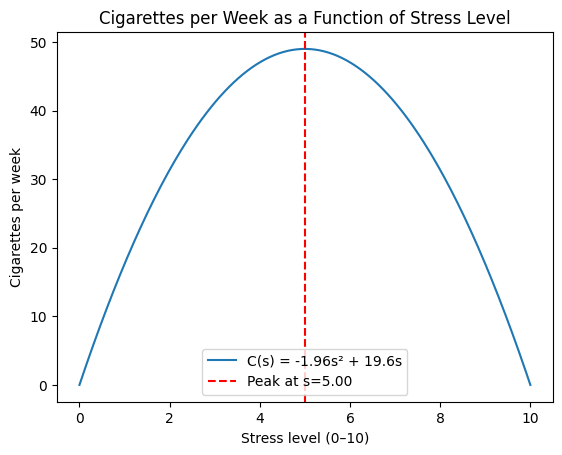

In [5]:
# Question 2a - Stress and smoking peak

import numpy as np
import matplotlib.pyplot as plt

# Define the function
def C(s):
    return -1.96 * s**2 + 19.6 * s

# Create stress values 0–10
s = np.linspace(0, 10, 200)
c_values = C(s)

# Find peak using derivative: C'(s) = -3.92s + 19.6 → set to 0
s_peak = 19.6 / 3.92
c_peak = C(s_peak)

print(f"Peak stress level: {s_peak:.2f}")
print(f"Maximum cigarettes per week: {c_peak:.2f}")

# Plot
plt.plot(s, c_values, label="C(s) = -1.96s² + 19.6s")
plt.axvline(s_peak, color="red", linestyle="--", label=f"Peak at s={s_peak:.2f}")
plt.xlabel("Stress level (0–10)")
plt.ylabel("Cigarettes per week")
plt.title("Cigarettes per Week as a Function of Stress Level")
plt.legend()
plt.show()


In [6]:
# Question 2b - Total cigarettes from stress 0 to peak (s=5)

import numpy as np

# Given function
def C(s):
    return -1.96 * s**2 + 19.6 * s

s_peak = 19.6 / 3.92  # = 5

# 1) Closed-form integral of C(s) from 0 to s_peak
# ∫(-1.96 s^2 + 19.6 s) ds = (-1.96/3) s^3 + (19.6/2) s^2
def integral_closed_form(s):
    return (-1.96/3) * s**3 + (19.6/2) * s**2

area_closed = integral_closed_form(s_peak) - integral_closed_form(0)

# 2) Numerical check with trapezoidal rule
s_grid = np.linspace(0, s_peak, 1000)
area_numeric = np.trapz(C(s_grid), s_grid)

# Average cigarettes between 0 and s_peak (optional, for context)
avg_0_to_peak = area_closed / s_peak

print(f"Peak s: {s_peak:.2f}")
print(f"Total cigarettes from s=0 to s=peak (closed-form): {area_closed:.2f}")
print(f"Total cigarettes from s=0 to s=peak (numeric): {area_numeric:.2f}")
print(f"Average cigarettes over [0, peak]: {avg_0_to_peak:.2f}")


Peak s: 5.00
Total cigarettes from s=0 to s=peak (closed-form): 163.33
Total cigarettes from s=0 to s=peak (numeric): 163.33
Average cigarettes over [0, peak]: 32.67


/tmp/ipykernel_26002/3037311874.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_numeric = np.trapz(C(s_grid), s_grid)


Living with parents:
count    494.000000
mean       0.805668
std        2.309406
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       11.000000
Name: cigarettes, dtype: float64 

Living in student housing:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cigarettes, dtype: float64 



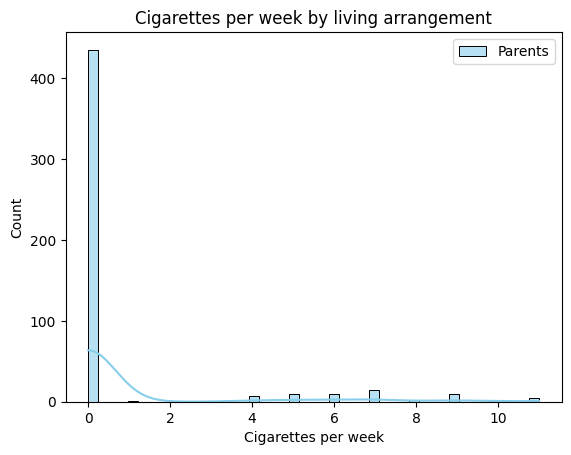

T-test p-value: nan
Mann-Whitney U-test p-value: nan


/home/codespace/.local/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/tmp/ipykernel_26002/1906835816.py:28: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_u = mannwhitneyu(home, housing, alternative="two-sided")


In [7]:
# Question 3a - Smoking behavior vs living arrangement

import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# Group the data
home = df[df["living_arrangement"] == "parents"]["cigarettes"]
housing = df[df["living_arrangement"] == "student housing"]["cigarettes"]

# Descriptive statistics
print("Living with parents:")
print(home.describe(), "\n")

print("Living in student housing:")
print(housing.describe(), "\n")

# Check normality visually
sns.histplot(home, kde=True, color="skyblue", label="Parents", alpha=0.6)
sns.histplot(housing, kde=True, color="orange", label="Student housing", alpha=0.6)
plt.legend()
plt.title("Cigarettes per week by living arrangement")
plt.xlabel("Cigarettes per week")
plt.ylabel("Count")
plt.show()

# Because cigarette data is skewed, use both t-test and Mann-Whitney U for robustness
t_stat, p_t = ttest_ind(home, housing, equal_var=False)
u_stat, p_u = mannwhitneyu(home, housing, alternative="two-sided")

print(f"T-test p-value: {p_t:.4f}")
print(f"Mann-Whitney U-test p-value: {p_u:.4f}")


                    count      mean       std  min  25%  50%  75%   max
exercise_frequency                                                     
average             169.0  1.810651  3.165984  0.0  0.0  0.0  4.0  11.0
high                415.0  0.308434  1.526355  0.0  0.0  0.0  0.0  11.0
low                 247.0  3.502024  3.786878  0.0  0.0  1.0  7.0  11.0 



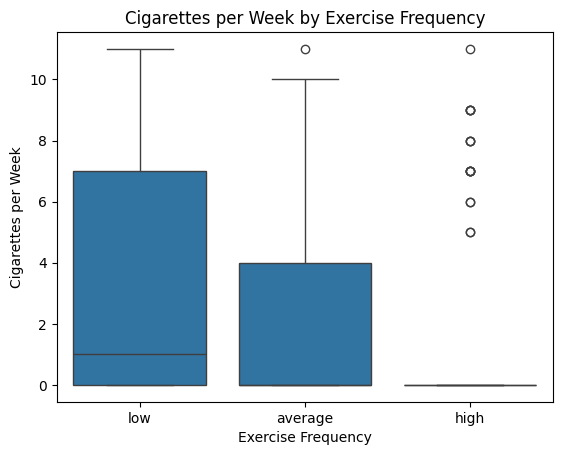

ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


In [8]:
# Question 3b - Smoking vs exercise frequency

import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Quick descriptive stats
group_stats = df.groupby("exercise_frequency")["cigarettes"].describe()
print(group_stats, "\n")

# Boxplot for visual comparison
sns.boxplot(x="exercise_frequency", y="cigarettes", data=df, order=["low", "average", "high"])
plt.title("Cigarettes per Week by Exercise Frequency")
plt.xlabel("Exercise Frequency")
plt.ylabel("Cigarettes per Week")
plt.show()

# ANOVA test (parametric)
groups = [df[df["exercise_frequency"] == g]["cigarettes"] for g in ["low", "average", "high"]]
f_stat, p_anova = f_oneway(*groups)
print(f"ANOVA p-value: {p_anova:.4f}")

# Kruskal-Wallis (non-parametric)
h_stat, p_kw = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p_kw:.4f}")


Estimated a (max caffeine consumption): 23.00


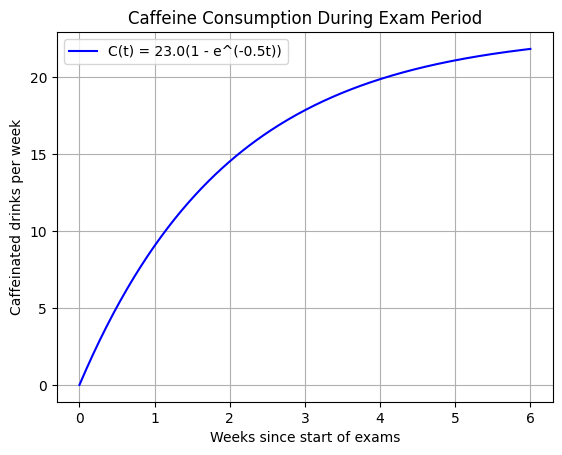

In [9]:
# Question 4a - Caffeine consumption during exam period

import numpy as np
import matplotlib.pyplot as plt

# Growth factor
b = 0.5

# Estimate 'a' as the maximum observed caffeine consumption in the dataset
a = df["caffeinated_drinks"].max()
print(f"Estimated a (max caffeine consumption): {a:.2f}")

# Define the function C(t) = a * (1 - e^(-b*t))
def C(t):
    return a * (1 - np.exp(-b * t))

# Generate values for t = 0 to 6 weeks
t = np.linspace(0, 6, 200)
c_values = C(t)

# Plot
plt.plot(t, c_values, label=f"C(t) = {a:.1f}(1 - e^(-0.5t))", color="blue")
plt.title("Caffeine Consumption During Exam Period")
plt.xlabel("Weeks since start of exams")
plt.ylabel("Caffeinated drinks per week")
plt.grid(True)
plt.legend()
plt.show()


t=0 weeks -> C'(t)=11.50 drinks/week per week
t=1 weeks -> C'(t)=6.98 drinks/week per week
t=2 weeks -> C'(t)=4.23 drinks/week per week
t=3 weeks -> C'(t)=2.57 drinks/week per week
t=4 weeks -> C'(t)=1.56 drinks/week per week
t=5 weeks -> C'(t)=0.94 drinks/week per week
t=6 weeks -> C'(t)=0.57 drinks/week per week


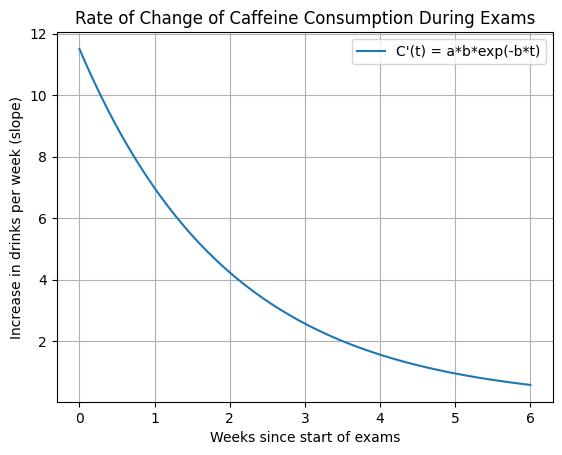

In [10]:
# Question 4b - Rate of change of caffeine consumption

import numpy as np
import matplotlib.pyplot as plt

# Parameters from 4a
b = 0.5
a = df["caffeinated_drinks"].max()  # 23 based on your data

# C(t) and its derivative C'(t)
def C(t):
    return a * (1 - np.exp(-b * t))

def dC_dt(t):
    return a * b * np.exp(-b * t)

# Sample times
t = np.linspace(0, 6, 200)
rates = dC_dt(t)

# Print key rates
check_points = np.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
for tp in check_points:
    print(f"t={tp:.0f} weeks -> C'(t)={dC_dt(tp):.2f} drinks/week per week")

# Plot derivative
plt.plot(t, rates, label="C'(t) = a*b*exp(-b*t)")
plt.title("Rate of Change of Caffeine Consumption During Exams")
plt.xlabel("Weeks since start of exams")
plt.ylabel("Increase in drinks per week (slope)")
plt.grid(True)
plt.legend()
plt.show()


In [11]:
# Question 5a - Probability of screen time under 1.5 hours

from scipy.stats import norm

# Given parameters
mu = 3.5   # mean
sigma = 1.2  # standard deviation

# Target value
x = 1.5

# P(X < 1.5)
prob = norm.cdf(x, mu, sigma)
print(f"Probability that a student spends less than 1.5 hours/day: {prob:.4f}")


Probability that a student spends less than 1.5 hours/day: 0.0478


In [12]:
# Question 5b - Minimum screen time for top 10%

from scipy.stats import norm

# Given parameters
mu = 3.5   # mean
sigma = 1.2  # standard deviation

# Find cutoff for top 10% → 90th percentile
cutoff = norm.ppf(0.90, mu, sigma)
print(f"Minimum screen time to be in the top 10%: {cutoff:.2f} hours/day")


Minimum screen time to be in the top 10%: 5.04 hours/day


In [13]:
# Question 5c - Sample mean and margin of error for screen time

import numpy as np
from scipy.stats import norm

# Extract data
screen = df["screen_time"].dropna()

# Sample statistics
mean_screen = screen.mean()
std_screen = screen.std()
n = len(screen)

# 95% confidence interval → z = 1.96
z = 1.96
margin_error = z * (std_screen / np.sqrt(n))

print(f"Sample size: {n}")
print(f"Sample mean screen time: {mean_screen:.2f} hours/day")
print(f"Margin of error (95% CI): ±{margin_error:.2f} hours/day")
print(f"95% Confidence Interval: [{mean_screen - margin_error:.2f}, {mean_screen + margin_error:.2f}]")


Sample size: 831
Sample mean screen time: 3.10 hours/day
Margin of error (95% CI): ±0.06 hours/day
95% Confidence Interval: [3.04, 3.17]


In [14]:
# Question 6a - Probability of smoking fewer than 5 cigarettes per week

# Count students smoking < 5 cigarettes per week
below_5 = (df["cigarettes"] < 5).sum()
total_students = len(df)
prob_under_5 = below_5 / total_students

print(f"Students smoking fewer than 5 cigarettes/week: {below_5}")
print(f"Total students: {total_students}")
print(f"Estimated probability: {prob_under_5:.4f}")


Students smoking fewer than 5 cigarettes/week: 669
Total students: 831
Estimated probability: 0.8051


In [15]:
# Question 6b - Compare low vs high exercise frequency groups

import numpy as np
from scipy.stats import norm

# Create smoker flag: <5 cigarettes/week
df["under5"] = df["cigarettes"] < 5

# Count by exercise group
freq_ex = df[df["exercise_frequency"] == "high"]
infreq_ex = df[df["exercise_frequency"] == "low"]

count_high = freq_ex["under5"].sum()
n_high = len(freq_ex)
count_low = infreq_ex["under5"].sum()
n_low = len(infreq_ex)

# Proportions
p_high = count_high / n_high
p_low = count_low / n_low

# Two-proportion z-test
p_pool = (count_high + count_low) / (n_high + n_low)
z = (p_high - p_low) / np.sqrt(p_pool * (1 - p_pool) * (1/n_high + 1/n_low))
p_value = 1 - norm.cdf(z)  # one-tailed (high > low)

print(f"High exercisers (<5 cigarettes): {count_high}/{n_high} = {p_high:.3f}")
print(f"Low exercisers (<5 cigarettes): {count_low}/{n_low} = {p_low:.3f}")
print(f"Difference: {p_high - p_low:.3f}")
print(f"Z-statistic: {z:.3f}")
print(f"P-value (high > low): {p_value:.4f}")


High exercisers (<5 cigarettes): 398/415 = 0.959
Low exercisers (<5 cigarettes): 139/247 = 0.563
Difference: 0.396
Z-statistic: 12.600
P-value (high > low): 0.0000


In [16]:
# Question 6c - Test if new data shows improvement

import numpy as np
from scipy.stats import norm

# Previous estimated proportion from 6a
p_old = 0.8051

# New survey data
n_new = 50
x_new = 8
p_new = x_new / n_new

# Hypothesis test:
# H0: p_new <= p_old  (no improvement)
# H1: p_new > p_old   (policy improved)
z = (p_new - p_old) / np.sqrt(p_old * (1 - p_old) / n_new)
p_value = 1 - norm.cdf(z)  # one-tailed test (improvement)

print(f"Old proportion (p0): {p_old:.4f}")
print(f"New proportion (p̂): {p_new:.4f}")
print(f"Z-statistic: {z:.3f}")
print(f"P-value (improvement): {p_value:.4f}")


Old proportion (p0): 0.8051
New proportion (p̂): 0.1600
Z-statistic: -11.515
P-value (improvement): 1.0000


In [17]:
# Question 6d - How likely is p > 0.75 with new data (x=8, n=50)?

from scipy.stats import binomtest, beta

x = 8
n = 50
p0 = 0.75

# 1) Frequentist: exact binomial test for H0: p <= 0.75 vs H1: p > 0.75
# Since x is far below n*p0, expect p-value ~ 1.0 (no evidence p > 0.75)
test = binomtest(x, n, p0, alternative="greater")
p_value = test.pvalue

# 95% two-sided exact CI for reference (Clopper-Pearson)
ci_two_sided = test.proportion_ci(confidence_level=0.95, method="exact")

# Also compute a one-sided 95% upper confidence bound for p (Hahn–Meeker style via binomtest)
# SciPy gives two-sided; we can report the upper bound from two-sided CI as a rough check.
upper_bound_95 = ci_two_sided.high

print(f"Sample proportion: {x/n:.4f}")
print(f"Exact binomial test p-value for p > 0.75: {p_value:.6f}")
print(f"95% exact CI (two-sided): [{ci_two_sided.low:.4f}, {ci_two_sided.high:.4f}]")
print(f"95% upper bound (from two-sided CI): {upper_bound_95:.4f}")

# 2) Optional Bayesian (only if allowed): Uniform prior Beta(1,1) -> posterior Beta(x+1, n-x+1)
a_post, b_post = x + 1, n - x + 1
prob_p_gt_075 = 1 - beta.cdf(0.75, a_post, b_post)
print(f"Bayesian (Beta(1,1) prior) P(p > 0.75 | data): {prob_p_gt_075:.8f}")


Sample proportion: 0.1600
Exact binomial test p-value for p > 0.75: 1.000000
95% exact CI (two-sided): [0.0822, 1.0000]
95% upper bound (from two-sided CI): 1.0000
Bayesian (Beta(1,1) prior) P(p > 0.75 | data): 0.00000000
